# Logaritmera variabler
_Av Anders Sundell_

Att hitta på data är naturligtvis aldrig okej när man gör en seriös statistisk analys. Men att _transformera_ variabler är något helt annat. Det handlar då om att manipulera variablerna på något systematiskt sätt, så att de bättre svarar mot en annan frågeställning eller modell.

Ofta har vi till exempel data med en skev fördelning. Dvs, det finns väldigt många små värden, men bara några få stora, till exempel.

Sådana mönster kan ofta uppstå när man har att göra med självförstärkande processer. Ta till exempel befolkningsmängden i en stad. Varje år föds det nya barn i staden. Ju större stad, desto fler barn föds. I absoluta tal kommer därför de större städerna växa snabbare än de små. I stadsexemplet blir också en större stad mer attraktiv som mål för inflyttning, vilket gör att den växer ännu snabbare. På så sätt kommer de redan stora städerna gradvis öka sitt försprång.

Detsamma gäller ekonomi. Åt den som har skall varda givet står det i bibeln: Det är lättare att tjäna pengar om man redan är rik. Inkomstfördelningar blir därför ofta skeva. Nedan visas ett histogram över BNP per capita i världens länder, enligt QoG basic-datamängden.


(Quality of Government Basic dataset 2018 - Cross-Section)

(bin=13, start=285.95001, width=7339.3091)


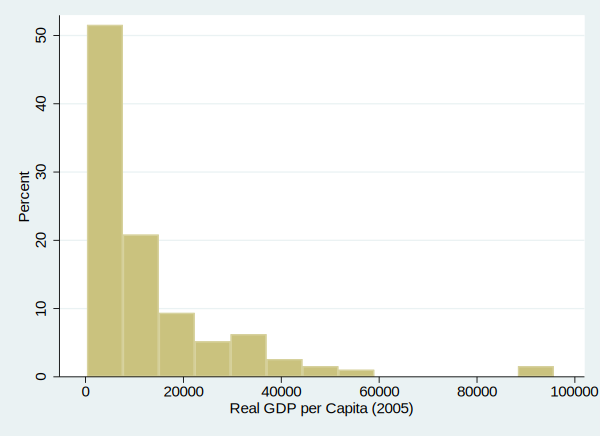

In [5]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear
histogram gle_rgdpc, percent

Över 50 procent av länderna återfinns i den minsta stapeln. Och långt ute till höger finns en ensam stapel, som innehåller några få extremt rika länder, till exempel Monaco. Det här är ett typexempel på skev data.

Om man tänker sig regressionsanalys som en gungbräda kommer Monaco sitta längst ut på brädan och därmed få störst vikt. Egenskaper hos länder med låga världen kommer inte tillmätas nästan någon vikt i analyserna.

Men med en enkel transformering kan vi ändra skalan på variabeln, och på så vis göra den normalfördelad och mer lämpad för statistisk analys.

## Logaritmisk transformation ##

Logaritmer har olika baser. Den kanske enklaste är tio-logaritmen. För varje tal frågar man sig då vad man behöver upphöja tio till, för att få det ursprungliga talet. Ta till exempel talet 100. För att få fram det behöver vi upphöja 10 till 2, dvs $10\cdot10 = 10^2 = 100$. Tio-logaritmen av 100 är alltså 2. Tio-logaritmen av 1000 är 3, eftersom $10^3=100$.

En annan, ännu mer användbar bas är talet $e$, som är ungefär 2,72. Logaritmen som har det talet som bas kallas den naturliga logaritmen. I tabellen nedan visas några tal, och vad de motsvaras av i logaritmer.


| Tal | 10-logaritm | Naturlig logaritm |
|----------|-----------|-----------|
| 1        |    0.00        |      0.00  |
| 10       |    1.00        |     2.30 | 
| 20       |    1.30      |     3.00   | 
| 30       |    1.48      |     3.40   | 
| 40       |    1.60      |     3.69   | 
| 50       |    1.70      |     3.91   | 
| 100       |    2.00      |     4.61   | 
| 500       |    2.70      |     6.21   | 
| 1000       |   3.00      |     6.91   | 



Det som blir tydligt är att logaritmerna ökar långsammare och långsammare, ju högre upp vi kommer på skalan. För att öka 10-logaritmen från 1 till 2 behöver vi gå från 10 till 100. Men för att öka den från 2 till 3 behöver vi gå från 100 till 1000. Detsamma gäller för den naturliga logaritmen, även om talen inte blir lika jämna och fina.

Logaritmiska skalor kan tolkas som att de visar förhållanden, snarare än absoluta skillnader. Varje skalsteg upp på tio-logaritmen innebär atttalet blir tio gånger större. Varje skalsteg upp på den naturliga logaritment innebär att talet blir 2,72 gånger större. Att den naturliga logaritmen är mer användbar beror på att man lättare kan tolka förändringar i den som procentuella förändringar.

## Göra en logaritmerad variabel i Stata
Att göra en logaritmisk transformation i Stata är enkelt. Vi använder `generate`-kommandot och skriver `ln()` om vi vill använda den naturliga logaritmen, eller `log10()` om vi vill ha 10-logaritmen. I koden nedan gör vi en av varje:

In [21]:
gen ln_gdpc = ln(gle_rgdpc)
gen log10_gdpc = log10(gle_rgdpc)


(2 missing values generated)

(2 missing values generated)


För att se hur den nya variabeln förhåller sig till den gamla kan vi göra en en scatterplot med logaritmen på y-axeln, och den normala variabeln på x-axeln.

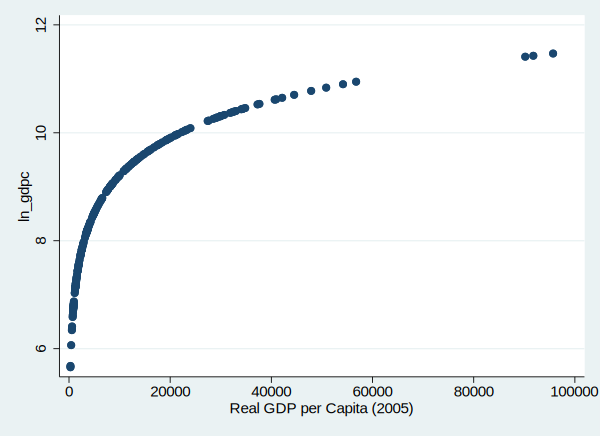

In [22]:
twoway (scatter ln_gdpc gle_rgdpc)

Det är alltså samma grunddata, visat på både x-axeln och y-axeln. Men skalan på y-axeln blir mer ihoptryckt. De tre rikaste länderna (Monaco, Qatar och Lichtenstein) ligger längre ifrån resten på x-axeln, jämfört med y-axeln, just eftersom det blir svårare och svårare att öka logaritmen.

Om vi med hjälp av variabeln som gjordes i kodsnutten ovan tittar på ett histogram av den logaritmerade BNP per capita (naturlig logaritm) ser fördelningen helt annorlunda ut:

(bin=13, start=5.655817, width=.44716344)


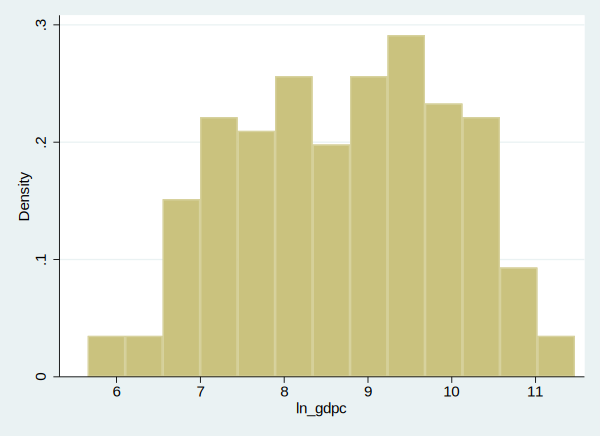

In [9]:
histogram ln_gdpc

Fördelningen ser nu mycket mer "ihopklämd" ut. Det är för att de faktiska avstånden mellan enheterna är mycket större (i dollar) till höger än till vänster i grafen. 6 på x-axeln motsvarar en BNP per capita om 403 dollar. 7 motsvarar 1096. 10 på x-axeln motsvarar istället hela 22000 dollar, och 11 innebär 59874 dollar per capita!

## Tolka logaritmerade variabler ##

Det här kanske verkar konstigt. Men i många fall är det rimligt, teoretiskt. Tänk till exempel på sambandet mellan livskvalitet och rikedom. För den som är fattig skulle en liten inkomstökning göra stor skillnad. Hans Rosling skriver till exempel bra i boken Factfulness om vilken skillnad det gör att ha sandaler, jämfört med att inte ha sandaler. Men för den som redan är rik krävs det en stor inkomstökning för att det ska märkas någon skillnad.

Pengar har en avtagande marginalnytta. Varje extra krona gör lite mindre nytta än den förra. Därför är det rimligt att titta på procentuella ökningar, som vi kan göra med logaritmer.

I de två graferna här nedan ser vi till exempel sambandet mellan förväntad livslängd i världens länder och BNP per capita, i absoluta tal till vänster, och logaritmerat till höger. Jag har även ritat ut linjer som ungefär visar det glidande medelvärdet (parenteserna som börjar med `lowess`).

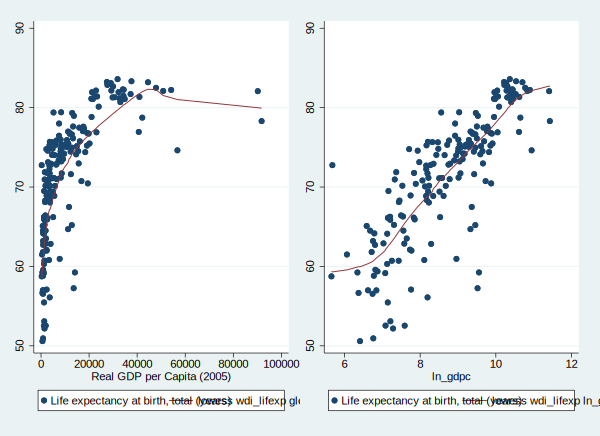

In [16]:
quietly twoway (scatter wdi_lifexp gle_rgdpc) (lowess wdi_lifexp gle_rgdpc), name(graph_normal, replace)
quietly twoway (scatter wdi_lifexp ln_gdpc) (lowess wdi_lifexp ln_gdpc), name(graph_log, replace)
graph combine graph_normal graph_log

Sambandet mellan livslängd och BNP per capita är ickelinjärt och avtagande. Sambandet mellan livslängd och logaritmerad BNP per capita är dock linjärt. Det betyder att vi får mindre och mindre effekt av att öka ett lands BNP per capita med någon fast summa, till exempel 1000 dollar. Men en procentuell ökning, till exempel en fördubbling, får liknande effekter över hela skalan (vilket är vad grafen till höger visar). Det gör också att variabeln till höger passar bättre att använda i en regressionsanalys.

## Avslutning

Skev data kan vara ett problem för statistiska analyser, eftersom det ger för stor vikt åt extrema värden, och gör att linjen passar sämre till den stora massan av datapunkter.

När datan är skev på ett speciellt sätt, så att det finns många små värden, och få stora, kan logaritmisk transformering vara ett bra alternativ. Särskilt gäller det när det finns god anledning att tro att den datagenererande processen är självförstärkande - som till exempel när det gäller befolkningstillväxt eller inkomster.

Logaritmerade variabler går också att använda både som beroende och oberoende variabel i regressionsanalyser. Men då behöver man tolka dem på ett speciellt sätt. [Se separat guide för det](regression_logarithm_sv.html).